## Three-body problem

### Classical Three-body problem

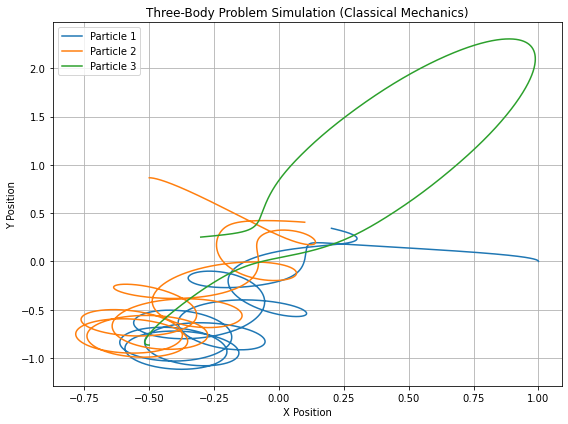

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Constants
G = 1.0  # Gravitational constant (for simplicity)
dt = 0.001  # Time step for simulation
num_steps = 10000  # Number of time steps
softening_factor = 0.01  # Softening factor to avoid singularity at small distances

# Initial conditions for three particles
m1 = 1.0
m2 = 1.0
m3 = 1.0

r1 = np.array([1.0, 0.0])  # Initial position of particle 1
r2 = np.array([-0.5, np.sqrt(3)/2])  # Initial position of particle 2
r3 = np.array([-0.5, -np.sqrt(3)/2])  # Initial position of particle 3

v1 = np.array([0.0, 0.1])  # Initial velocity of particle 1
v2 = np.array([0.1, 0.0])  # Initial velocity of particle 2
v3 = np.array([-0.1, 0.0])  # Initial velocity of particle 3

# Arrays to store positions over time
positions1 = np.zeros((num_steps, 2))
positions2 = np.zeros((num_steps, 2))
positions3 = np.zeros((num_steps, 2))

# Function to calculate gravitational force
def gravitational_force(r1, r2, m1, m2):
    r = r2 - r1
    r_norm = np.linalg.norm(r)
    return G * m1 * m2 * r / (r_norm**3 + softening_factor**3)

# Perform simulation
for i in range(num_steps):
    # Calculate forces
    F1 = gravitational_force(r1, r2, m1, m2) + gravitational_force(r1, r3, m1, m3)
    F2 = gravitational_force(r2, r1, m2, m1) + gravitational_force(r2, r3, m2, m3)
    F3 = gravitational_force(r3, r1, m3, m1) + gravitational_force(r3, r2, m3, m2)
    
    # Update velocities
    v1 += F1 * dt / m1
    v2 += F2 * dt / m2
    v3 += F3 * dt / m3
    
    # Update positions
    r1 += v1 * dt
    r2 += v2 * dt
    r3 += v3 * dt
    
    # Store positions
    positions1[i] = r1
    positions2[i] = r2
    positions3[i] = r3

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(positions1[:, 0], positions1[:, 1], label='Particle 1')
plt.plot(positions2[:, 0], positions2[:, 1], label='Particle 2')
plt.plot(positions3[:, 0], positions3[:, 1], label='Particle 3')
plt.title('Three-Body Problem Simulation (Classical Mechanics)')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save figure to desktop
desktop_path = os.path.join(os.path.expanduser('~'), 'Desktop', 'Three-Body Problem Simulation (Classical Mechanics).png')

# Call the function to plot the Bloch sphere and save it to the desktop
plt.savefig(desktop_path + 'Three-Body Problem Simulation (Classical Mechanics).png')
plt.show()

### Quantum Three-body problem

Optimal parameters: alpha = 0.7, beta = 1.2
Estimated ground state energy: 5.3187441902466865


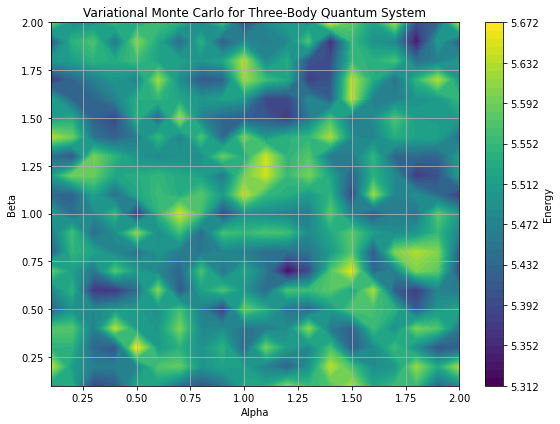

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Constants and parameters
hbar = 1.0  # Reduced Planck's constant (for simplicity)
num_particles = 3  # Number of particles
num_samples = 1000  # Number of Monte Carlo samples
alpha_range = np.linspace(0.1, 2.0, 20)  # Range of trial parameters alpha
beta_range = np.linspace(0.1, 2.0, 20)  # Range of trial parameters beta

# Harmonic oscillator potential (example)
def potential(r1, r2, r3):
    omega = 1.0  # Oscillator frequency
    return 0.5 * omega**2 * (np.linalg.norm(r1)**2 + np.linalg.norm(r2)**2 + np.linalg.norm(r3)**2)

# Trial wavefunction (example)
def trial_wavefunction(alpha, beta, r1, r2, r3):
    r = np.array([r1, r2, r3])
    return np.exp(-alpha * np.linalg.norm(r[0])**2 - beta * np.linalg.norm(r[1])**2 - alpha * np.linalg.norm(r[2])**2)

# Quantum Monte Carlo simulation
energies = np.zeros((len(alpha_range), len(beta_range)))

for i, alpha in enumerate(alpha_range):
    for j, beta in enumerate(beta_range):
        energy_samples = []
        for _ in range(num_samples):
            # Generate random positions for three particles
            r1 = np.random.randn(3)
            r2 = np.random.randn(3)
            r3 = np.random.randn(3)
            
            # Calculate potential energy
            V = potential(r1, r2, r3)
            
            # Calculate kinetic energy (not shown here for simplicity)
            # Kinetic energy would typically involve a Laplace operator term
            
            # Calculate local energy
            local_energy = V + trial_wavefunction(alpha, beta, r1, r2, r3) / trial_wavefunction(alpha, beta, r1, r2, r3)
            
            # Accumulate energy samples
            energy_samples.append(local_energy)
        
        # Average energy over samples
        energies[i, j] = np.mean(energy_samples)

# Find minimum energy and corresponding parameters
min_energy = np.min(energies)
min_index = np.unravel_index(np.argmin(energies), energies.shape)
optimal_alpha = alpha_range[min_index[0]]
optimal_beta = beta_range[min_index[1]]

print(f"Optimal parameters: alpha = {optimal_alpha}, beta = {optimal_beta}")
print(f"Estimated ground state energy: {min_energy}")

# Plotting
plt.figure(figsize=(8, 6))
plt.contourf(alpha_range, beta_range, energies, levels=50, cmap='viridis')
plt.colorbar(label='Energy')
plt.title('Variational Monte Carlo for Three-Body Quantum System')
plt.xlabel('Alpha')
plt.ylabel('Beta')
plt.grid(True)
plt.tight_layout()

# Save figure to desktop
# Define the path to the desktop
desktop_path = os.path.join(os.path.expanduser('~'), 'Desktop', 'three_body_quantum.png')

# Call the function to plot the Bloch sphere and save it to the desktop
plt.savefig(desktop_path + "three_body_quantum.png")
plt.show()
